In [86]:
import pandas as pd
from fbprophet import Prophet
from datetime import datetime
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = (20,10)
import numpy as np

In [87]:
df = pd.read_csv('myit.csv', index_col='DATE', parse_dates=True) # historical average temperature of Myitkyina,
# Myanmar downloaded from NOAA
# displaying with DATE column as index column


In [88]:
df.head() #displaying some data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,
2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"
2010-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",NaN,NaN,NaN,NaN
2010-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,60,"H,,S",81.0,",,S",46.0,",,S"
2010-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,62,"H,,S",81.0,",,S",45.0,",,S"
2010-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,65,"H,,S",NaN,NaN,49.0,",,S"


In [89]:
datatest=df.reset_index() #resetting index, see the difference, without resetting it, it cannot rename columns
datatest.head()

,DATE,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"
1,2010-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",NaN,NaN,NaN,NaN
2,2010-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,60,"H,,S",81.0,",,S",46.0,",,S"
3,2010-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,62,"H,,S",81.0,",,S",45.0,",,S"
4,2010-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,65,"H,,S",NaN,NaN,49.0,",,S"


In [90]:
datatest=datatest.rename(columns={'DATE':'ds', 'TAVG':'y'}) 
#renaming the columns for prophet, columns need to be ds and y for DATE(date) and TAVG(temperature average)

In [91]:
datatest.tail(10)

,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
2330,2017-12-22,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,68,"H,,S",NaN,NaN,51.0,",,S"
2331,2017-12-23,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,70,"H,,S",NaN,NaN,NaN,NaN
2332,2017-12-24,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,68,"H,,S",NaN,NaN,50.0,",,S"
2333,2017-12-26,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,70,"H,,S",80.0,",,S",50.0,",,S"
2334,2017-12-27,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,71,"H,,S",NaN,NaN,53.0,",,S"
2335,2017-12-28,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,72,"H,,S",82.0,",,S",51.0,",,S"
2336,2017-12-29,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,71,"H,,S",82.0,",,S",51.0,",,S"
2337,2017-12-30,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,72,"H,,S",NaN,NaN,53.0,",,S"
2338,2017-12-31,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,0.0,"B,,S",71,"H,,S",81.0,",,S",53.0,",,S"
2339,2018-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,68,"H,,S",74.0,",,S",53.0,",,S"


In [92]:
datatest=datatest.replace(0,np.NaN) 
#removing NaN(null) values and replaced with 0

In [93]:
model = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True) 
#creating model with yearly, weekly and daily seasonality
model.fit(datatest)
#fitting or training with dataset

/home/ttw/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [94]:
future = model.make_future_dataframe(periods=1000, freq = 'd')
#make future dataframe of 1000 days in advance for predictions with daily frequency

In [95]:
forecast = model.predict(future)
#predicting the model

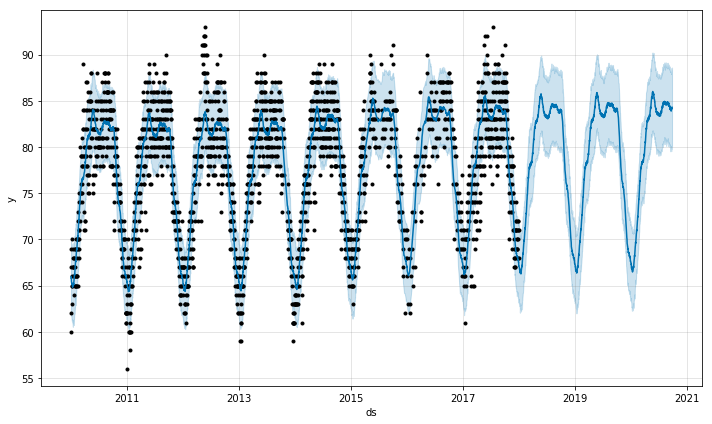

In [96]:
model.plot(forecast);
#visualizing the model, historical data only for January 2018, it predict to 2021

# Now We can verify the model with the existing data

In [97]:
tdata=datatest.head(365+365)

In [98]:
tdata.tail(80)

,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
650,2011-12-27,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,72,"H,,S",84.0,",,S",58.0,",,S"
651,2011-12-28,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",83.0,",,S",55.0,",,S"
652,2011-12-29,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,68,"H,,S",82.0,",,S",59.0,",,S"
653,2011-12-30,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",82.0,",,S",55.0,",,S"
654,2012-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",81.0,",,S",53.0,",,S"
655,2012-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,64,"H,,S",72.0,",,S",59.0,",,S"
656,2012-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,66,"H,,S",75.0,",,S",59.0,",,S"
657,2012-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",76.0,",,S",58.0,",,S"
658,2012-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",78.0,",,S",46.0,",,S"
659,2012-01-07,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,66,"H,,S",78.0,",,S",55.0,",,S"


In [99]:
tdata=datatest.head(654) 
#test data for 2 years

In [100]:
tdata.tail()

,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
649,2011-12-26,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,68,"H,,S",79.0,",,S",59.0,",,S"
650,2011-12-27,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,72,"H,,S",84.0,",,S",58.0,",,S"
651,2011-12-28,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",83.0,",,S",55.0,",,S"
652,2011-12-29,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,68,"H,,S",82.0,",,S",59.0,",,S"
653,2011-12-30,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",82.0,",,S",55.0,",,S"


In [101]:
vdata=datatest.head(654+654)

In [102]:
vdata.tail(15)

,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
1293,2013-12-28,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,63,"H,,S",76.0,",,S",53.0,",,S"
1294,2013-12-29,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,66,"H,,S",78.0,",,S",53.0,",,S"
1295,2013-12-30,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,64,"H,,S",77.0,",,S",51.0,",,S"
1296,2013-12-31,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,64,"H,,S",78.0,",,S",50.0,",,S"
1297,2014-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,63,"H,,S",NaN,NaN,49.0,",,S"
1298,2014-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,63,"H,,S",78.0,",,S",49.0,",,S"
1299,2014-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,63,"H,,S",NaN,NaN,50.0,",,S"
1300,2014-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,63,"H,,S",79.0,",,S",49.0,",,S"
1301,2014-01-05,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,63,"H,,S",80.0,",,S",49.0,",,S"
1302,2014-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,64,"H,,S",78.0,",,S",49.0,",,S"


In [103]:
vdata=datatest.head(1297)
#verified data for 4 years

In [104]:
vdata.tail()

,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
1292,2013-12-27,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,62,"H,,S",76.0,",,S",49.0,",,S"
1293,2013-12-28,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,63,"H,,S",76.0,",,S",53.0,",,S"
1294,2013-12-29,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,66,"H,,S",78.0,",,S",53.0,",,S"
1295,2013-12-30,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,64,"H,,S",77.0,",,S",51.0,",,S"
1296,2013-12-31,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,64,"H,,S",78.0,",,S",50.0,",,S"


In [105]:
tmodel = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True) 
vmodel = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True) 

#creating model with yearly, weekly and daily seasonality testing model and verifiying model
tmodel.fit(tdata)
vmodel.fit(vdata)

#fitting or training with dataset of testdata and verifing data

/home/ttw/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [106]:
tfuture = tmodel.make_future_dataframe(periods=1297-654, freq = 'd')
#predicting for (4 years days 1297 - 2 years 654 days) with daily frequency
vfuture = vmodel.make_future_dataframe(periods=0, freq = 'd')
# verified model is not predicting, so periods is Zero

In [107]:
tforecast=tmodel.predict(tfuture)
vforecast=vmodel.predict(vfuture)
# forecasting the prediction

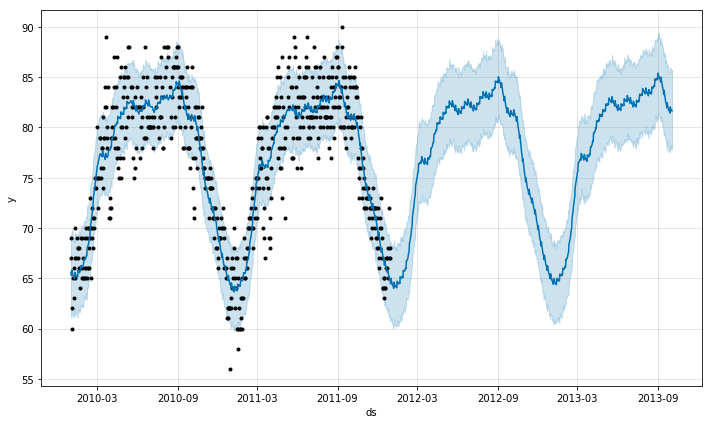

In [108]:
tmodel.plot(tforecast);
#visualizing the tested model with prediction of two years in advance, so it goes to december of 2013

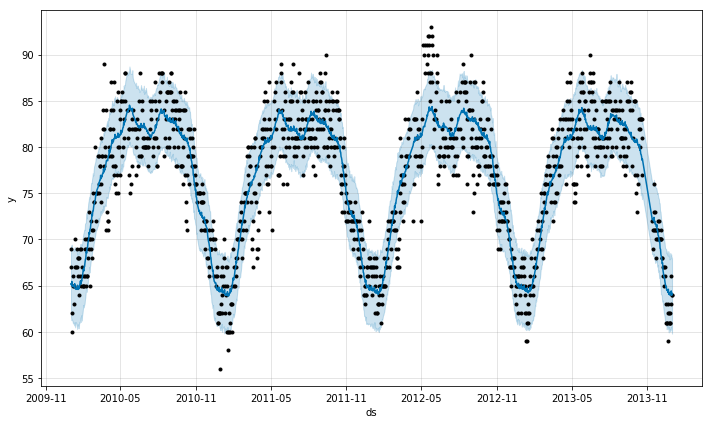

In [109]:
vmodel.plot(vforecast);
#visualizing the verifying model, no prediction only data are scatterd and the model is fitting to data points